# 2.2 Images
> Images printed with python from 2.2

In [ ]:
from IPython.display import Image, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Internet", 'label': "happy happy", 'file': "happy.jpg"},
            {'source': "Internet", 'label': "grey", 'file': "old internet color.png"},
            {'source': "Asher", 'label': "Asher", 'file': "asher3.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))


# Run this as standalone tester to see sample data printed in Jupyter terminal
if __name__ == "__main__":
    # print parameter supplied image
    green_square = image_data(images=[{'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"}])
    image_display(green_square)
    
    # display default images from image_data()
    default_images = image_data()
    image_display(default_images)

The third image would result in lossless data compression. The whole image is one shade, meaning there's no data to lose. This image could be compressed to one pixel and would stay identical. The fourth image would likely result in lossy data compression. There's many colors and shapes to this image, meaning a loss in data would be very noticable.

---- meta data -----
Green Square
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (320, 320)
-- original image --



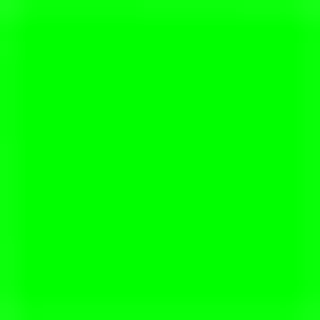

--- green image ----



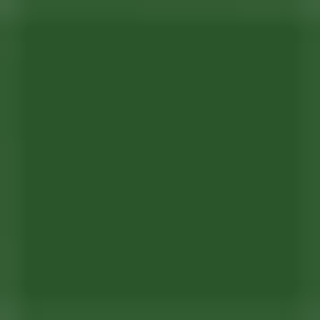

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (320, 234)
-- original image --



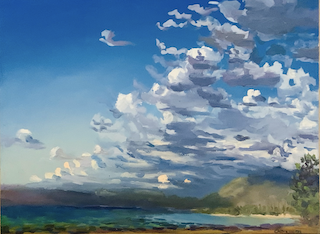

--- green image ----



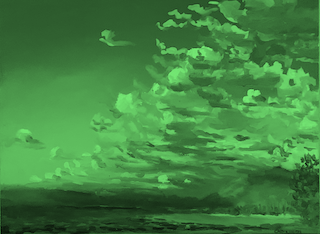

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (320, 240)
-- original image --



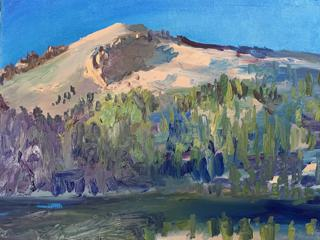

--- green image ----



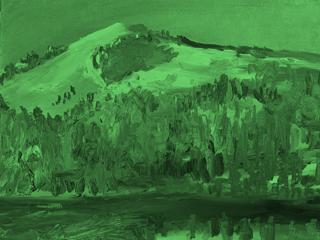

In [5]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
# Create Grey Scale Base64 representation of Image
def image_management_add_html_grey(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['gray_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['gray_data'].append((average // 2, average, average // 2, pixel[3])) # PNG format
        else:
            image['gray_data'].append((average // 2, average, average // 2))
        # end for loop for pixels
        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)


# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'])
        print("Scaled size: ", image['scaled_size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- green image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()